(A) Classificação: Com a base de dados escolhida, vocês deverão executar pelo menos três técnicas de classificação disponíveis na ferramenta adotada, fazendo uma comparação entre elas para a base adotada. Para cada estratégia, façam variações dos parâmetros de entrada. Uma tarefa opcional, que valorizaria o trabalho, é a utilização de uma técnica de auto-learning disponível na ferramenta adotada (se for o caso) para identificar (automaticamente) um algoritmo eficiente, com os respectivos valores de parâmetros de entrada calibrados, para a base em estudo.


(B) Associação: Vocês deverão extrair regras de associação da base escolhida, utilizando o algoritmo Apriori, tentando identificar quais são os elementos do domínio em questão cuja presença (ou ocorrência) aumentam ou diminuem a chance de um elemento alvo (um elemento de interesse, um elemento de estudo) acontecer. Explorem as medidas de interesse Suporte, Confiança e, principalmente, a medida Lift. O artigo de um ex-aluno de doutorado, Eduardo Gonçalves, sobre medidas de interesse pode ser encontrado no diretório Trabalho-Prático na pasta da turma no Google Drive. Vocês podem utilizar a mesma base escolhida para a tarefa de Classificação. Caso queiram escolher uma outra base para essa parte, peço que registrem essa escolha no arquivo compartilhado para evitar conflitos.


(C) Clusterização:
Para realizar a clusterização dos elementos da base escolhida, vocês deverão utilizar os algoritmos k-Means e DBSCAN. Caso vocês escolham uma base que já tenha um atributo classe, não deixem de desconsiderar esse atributo na clusterização. Caso contrário, a clusterização será influenciada por esse atributo e o exercício não fará sentido. Variem os parâmetros de entrada dos algoritmos selecionados. Analisem os resultados com base nos centróides dos clusters. Não deixem de avaliar o desvio padrão em torno da média quando avaliarem o algoritmo k-Means (ligue a opção displayStdDev). Lembrem-se de que o objetivo da clusterização não é encontrar a distribuição de classes original, caso a base tenha um atributo classe. A verificação se o resultado da clusterização coincide com a distribuição de classes pode ser realizada apenas por curiosidade, mas não deve ser uma forma de avaliar a qualidade da clusterização.

-Descrever as bases utilizadas;

-Informar os algoritmos escolhidos e suas motivações;

-Parâmetros utilizados;

-Analisar os resultados obtidos.

Seoul Bikes and Early diabetes

In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


In [87]:
#Import the dataset
df_diabetes = pd.read_csv('/mnt/d/Documents/Python IDLE/DM_Final_Project/DB/diabetes_data_upload.csv')
df_diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [114]:
count1 = 0
count2 = 0
for value in df_diabetes['class']:
    if value == 'Positive':
        count1 += 1
    else:
        count2 += 1
perc1 = (count1 * 100)/520
perc2 = (count2 * 100)/520
print('Yes: ', count1)
print('No: ', count2)
print("Percentage: (" + str(perc1) + "/" + str(perc2) + ")")
print(" & " + str(count1) + " & " + str(count2) + " & (" + str(perc1) + "\%/" + str(perc2) + "\%)\\")

Yes:  320
No:  200
Percentage: (61.53846153846154/38.46153846153846)
 & 320 & 200 & (61.53846153846154\%/38.46153846153846\%)\


A) Classificação

In [167]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

Banco de dados não possui valores nulos

In [168]:
#Binarize the data
df_diabetes[['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']] = OrdinalEncoder().fit_transform(df_diabetes[['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']])
df_diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,58,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,41,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,45,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,60,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [169]:
X = df_diabetes.drop(['class'], axis=1)
y = df_diabetes['class']

In [212]:
from sklearn.svm import LinearSVC #recommended by sklearn
from sklearn.linear_model import Perceptron #a single neuron neural net
from sklearn.linear_model import LogisticRegression # FIND OUT
from sklearn.ensemble import RandomForestClassifier #an ensemble method

estimators = [('LinearSVC Standard', LinearSVC()),
              ('LinearSVC RS42', LinearSVC(random_state=42)),
              ('Perceptron Standard', Perceptron()),
              ('Perceptron Penalty', Perceptron(penalty='elasticnet')),
              ('Logistic Regression Standard', LogisticRegression()),
              ('Logistic Regression C', LogisticRegression(C=1.5)),
              ('Random Forest Classifier Standard', RandomForestClassifier()),
              ('Random Forest Classifier NE200', RandomForestClassifier(n_estimators=200))]

In [213]:
from sklearn.model_selection import cross_validate, cross_val_predict
import sklearn.metrics as metrics

scoring = ['accuracy', 'precision', 'recall', 'f1']
scores = []
y_pred_total = []
fpr = []
tpr = []
auc = []

for (name, est) in (estimators):
    score = cross_validate(est, X, y, scoring=scoring, n_jobs=-1, verbose=0)
    y_pred = cross_val_predict(est, X, y, n_jobs=-1, verbose=0)
    scores.append(score)
    y_pred_total.append(y_pred)
    fpr_aux, tpr_aux, _ = metrics.roc_curve(y, y_pred)
    auc_aux = metrics.roc_auc_score(y, y_pred)
    fpr.append(fpr_aux)
    tpr.append(tpr_aux)
    auc.append(auc_aux)
print("Finished")

Finished


In [214]:
acc_sc = []
prec_sc = []
rec_sc = []
f1_sc = []
estimators_scores = []

for item in scores:
  aux_list = []
  acc_aux = item['test_accuracy'].mean()
  prec_aux = item['test_precision'].mean()
  rec_aux = item['test_recall'].mean()
  f1_aux = item['test_f1'].mean()

  acc_sc.append(acc_aux)
  prec_sc.append(prec_aux)
  rec_sc.append(rec_aux)
  f1_sc.append(f1_aux)
  aux_list.extend([acc_aux, prec_aux, rec_aux, f1_aux])
  estimators_scores.append(aux_list)

In [249]:
#Put the metrics into a new dataset
names = ['LinearSVC Std', 'LinearSVC RS42', 'Perceptron Std', 'Perceptron Penalty', 'Log. Regression Std', 'Log. Regression C', 'Rand. Forest Class. Std', 'Rand. Forest Class. NE200']
dict_aux = {'Estimators': names, 'Accuracy': acc_sc, 'Precision': prec_sc, 'Recall': rec_sc, 'F1': f1_sc}
df_scores = pd.DataFrame(dict_aux)
df_scores

,Estimators,Accuracy,Precision,Recall,F1
0,LinearSVC Std,0.884615,0.883914,0.943750,0.910210
1,LinearSVC RS42,0.867308,0.908011,0.887500,0.890781
2,Perceptron Std,0.807692,0.838625,0.906250,0.859223
3,Perceptron Penalty,0.594231,0.711648,0.471875,0.505129
4,Log. Regression Std,0.926923,0.951011,0.931250,0.940094
5,Log. Regression C,0.926923,0.951011,0.931250,0.940094
6,Rand. Forest Class. Std,0.971154,0.976103,0.978125,0.976829
7,Rand. Forest Class. NE200,0.975000,0.976103,0.984375,0.980054


<AxesSubplot:title={'center':'F1'}, xlabel='F1', ylabel='Estimators'>

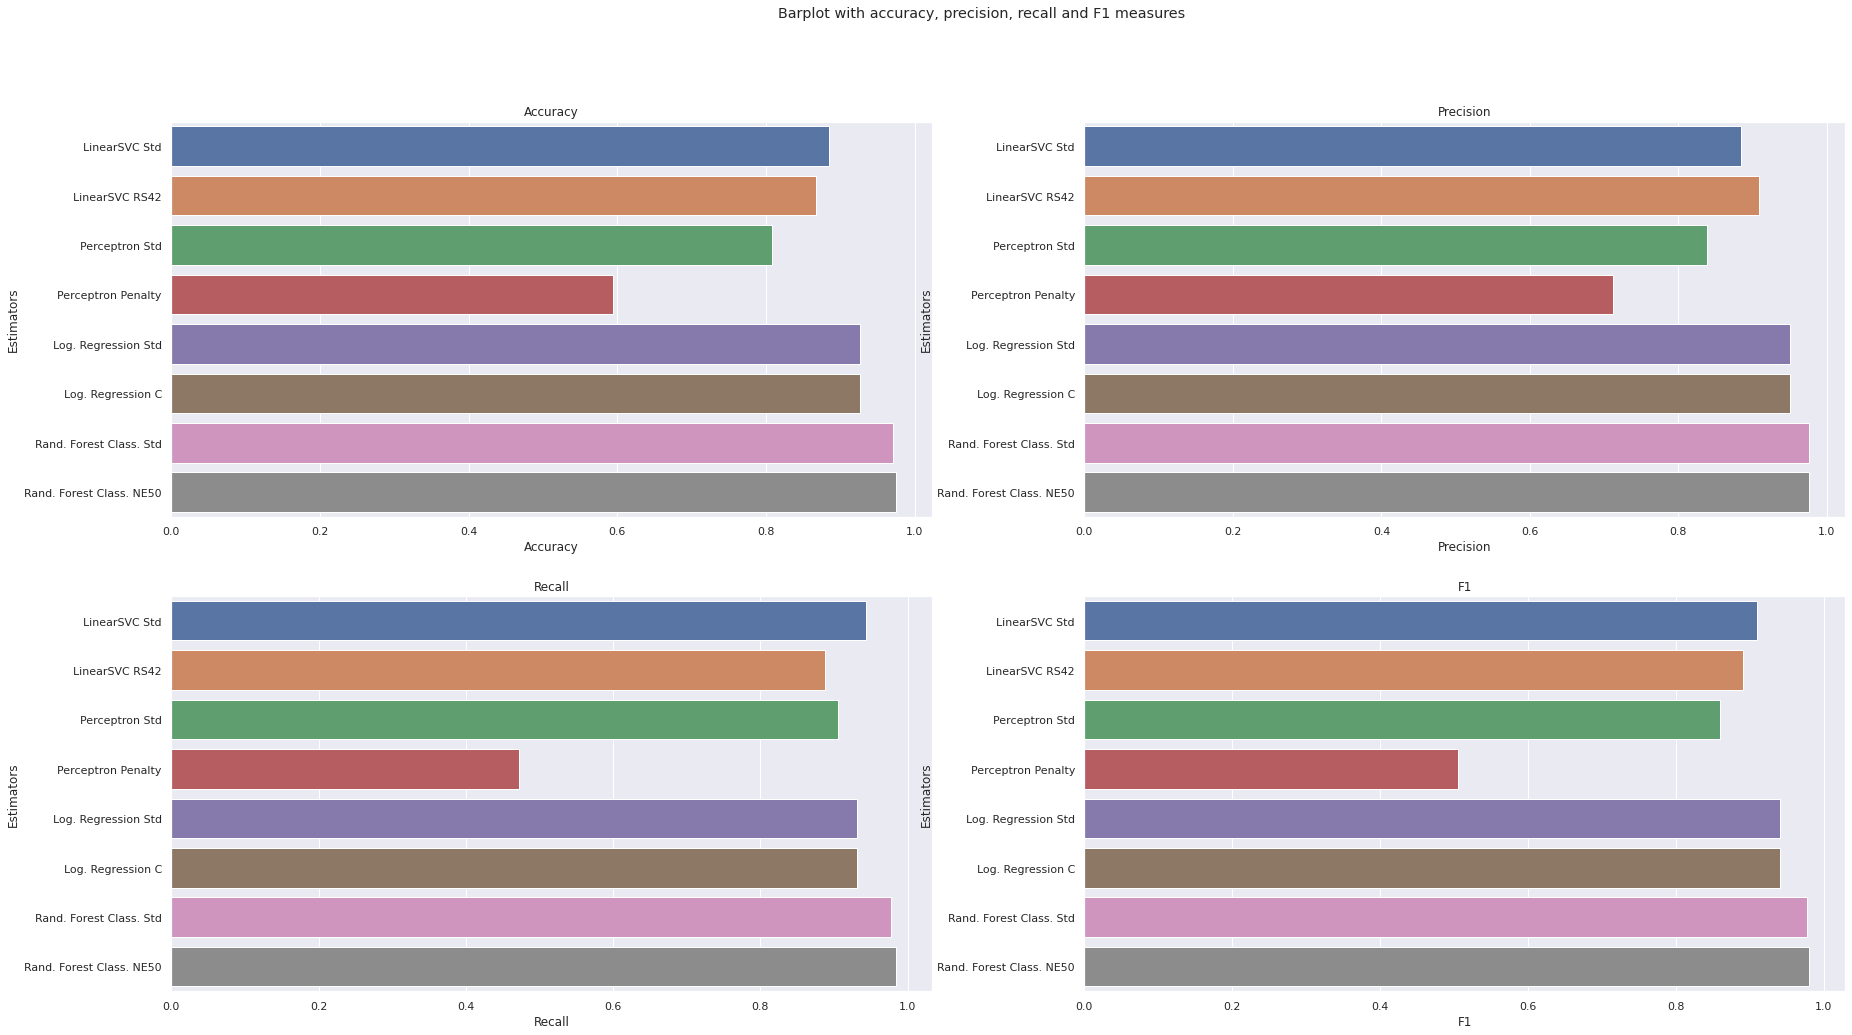

In [232]:
fig, axes = plt.subplots(2, 2, figsize=(30, 16))

fig.suptitle('Barplot with accuracy, precision, recall and F1 measures')
axes[0, 0].set_title('Accuracy')
axes[0, 1].set_title('Precision')
axes[1, 0].set_title('Recall')
axes[1, 1].set_title('F1')

sns.barplot(ax=axes[0, 0], y='Estimators', x='Accuracy', data=df_scores, ci=None, orient='h')
sns.barplot(ax=axes[0, 1], y='Estimators', x='Precision', data=df_scores, ci=None, orient='h')
sns.barplot(ax=axes[1, 0], y='Estimators', x='Recall', data=df_scores, ci=None, orient='h')
sns.barplot(ax=axes[1, 1], y='Estimators', x='F1', data=df_scores, ci=None, orient='h')
#sns.barplot(ax=axes[0, 0], data=df_scores, y='Estimators', x='Accuracy', orient='h')

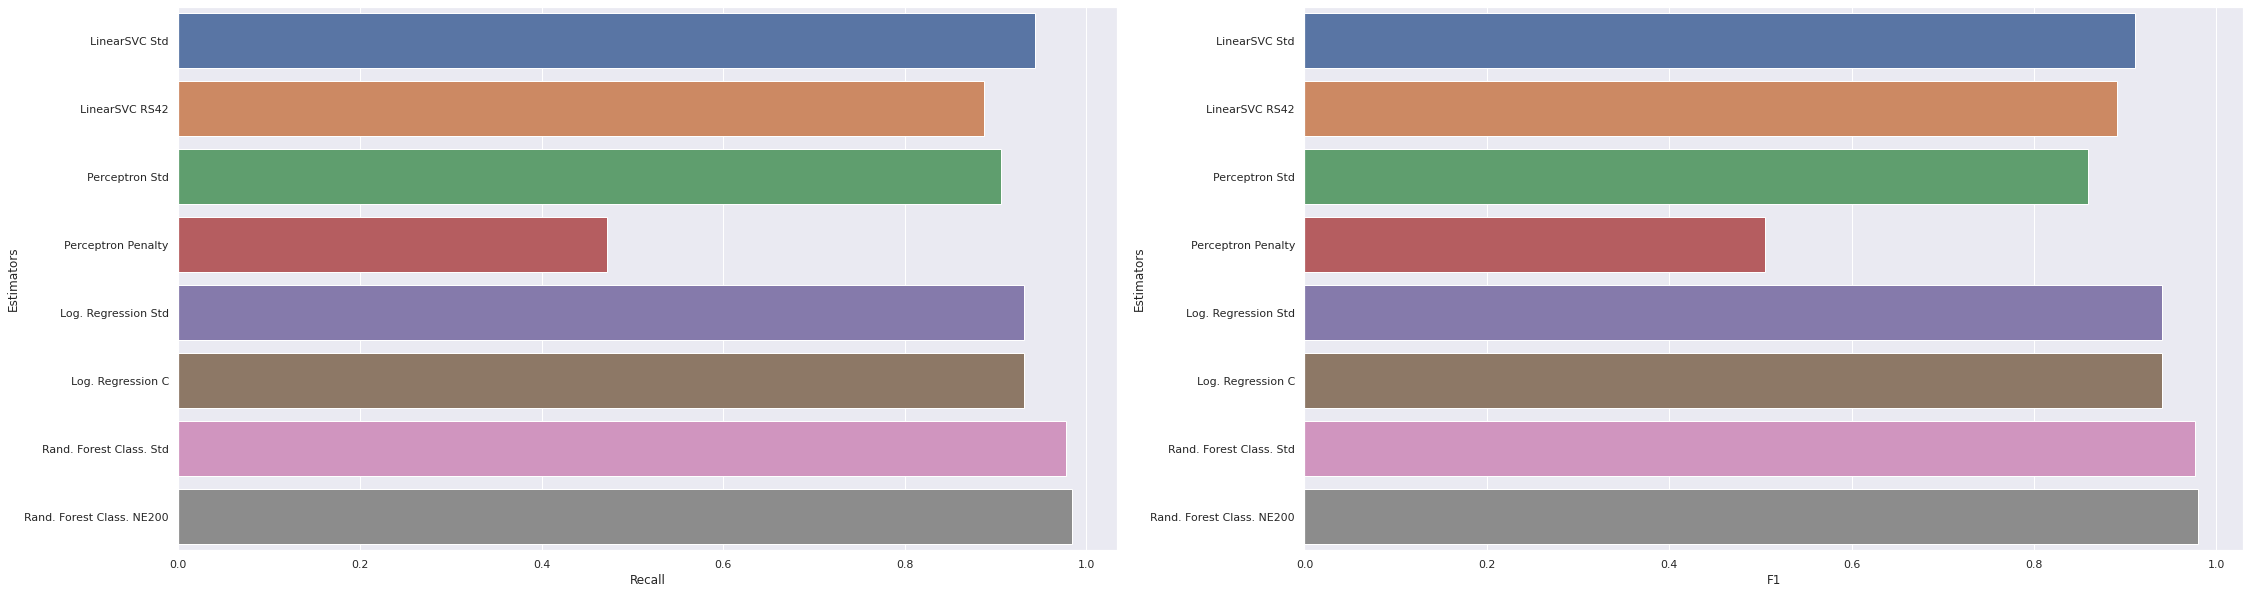

In [261]:
directory = '/mnt/d/Documents/Python IDLE/DM_Final_Project/Graphs/'

fig, axes = plt.subplots(1, 2, figsize=(37, 10))
#sns.barplot(ax=axes[0], y='Estimators', x='Accuracy', data=df_scores, ci=None, orient='h')
#sns.barplot(ax=axes[1], y='Estimators', x='Precision', data=df_scores, ci=None, orient='h')
sns.barplot(ax=axes[0], y='Estimators', x='Recall', data=df_scores, ci=None, orient='h')
sns.barplot(ax=axes[1], y='Estimators', x='F1', data=df_scores, ci=None, orient='h')

#sns.barplot(y='Estimators', x='Accuracy', data=df_scores, ci=None, orient='h')
#sns.barplot(y='Estimators', x='Precision', data=df_scores, ci=None, orient='h')
#sns.barplot(y='Estimators', x='Recall', data=df_scores, ci=None, orient='h')
#sns.barplot(y='Estimators', x='F1', data=df_scores, ci=None, orient='h')
plt.savefig(directory+'Recall_and_F1', bbox_inches='tight')

<AxesSubplot:title={'center':'F1'}>

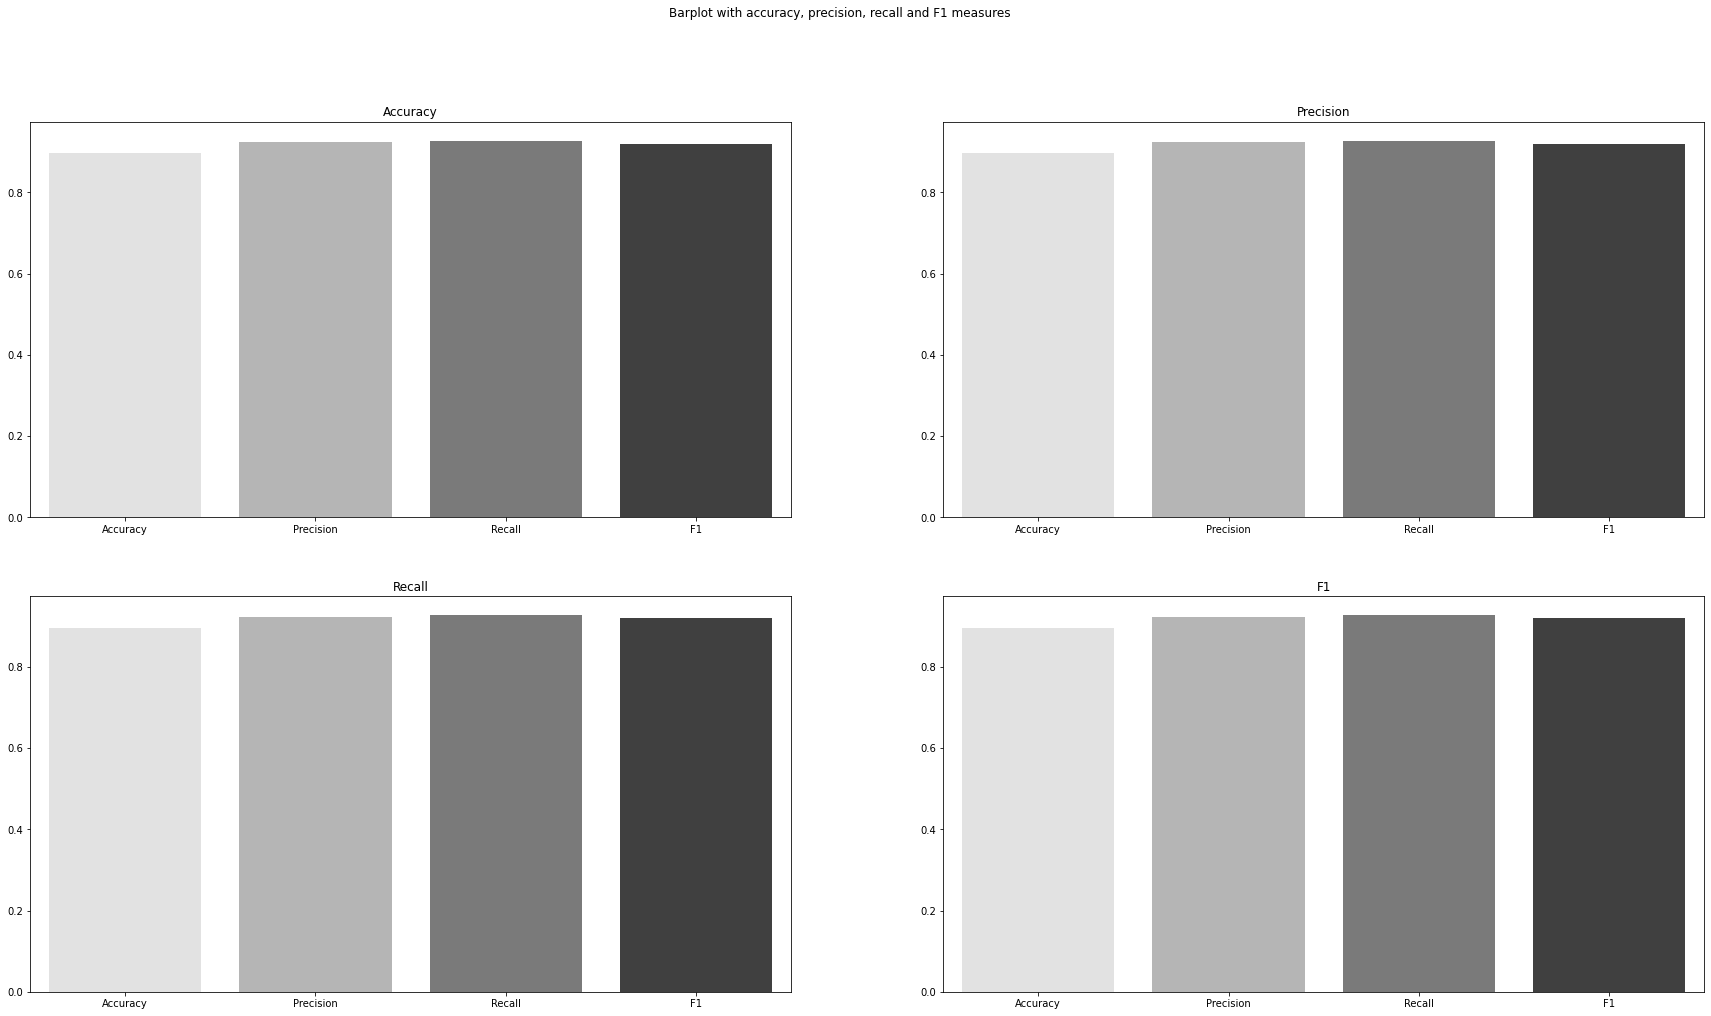

In [38]:
#Gray graphs
fig, axes = plt.subplots(2, 2, figsize=(30, 16))

fig.suptitle('Barplot with accuracy, precision, recall and F1 measures')
axes[0, 0].set_title('Accuracy')
axes[0, 1].set_title('Precision')
axes[1, 0].set_title('Recall')
axes[1, 1].set_title('F1')

sns.barplot(ax=axes[0, 0], data=df_scores, ci=None, palette='Greys')
sns.barplot(ax=axes[0, 1], data=df_scores, ci=None, palette='Greys')
sns.barplot(ax=axes[1, 0], data=df_scores, ci=None, palette='Greys')
sns.barplot(ax=axes[1, 1], data=df_scores, ci=None, palette='Greys')

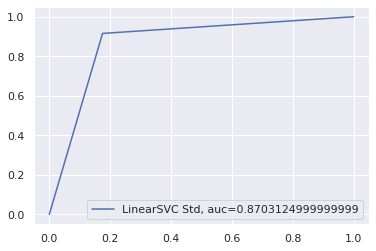

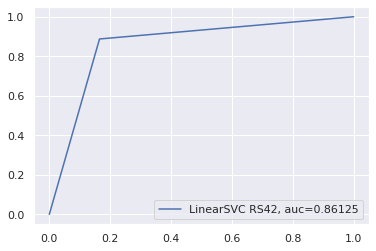

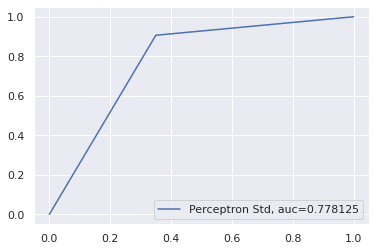

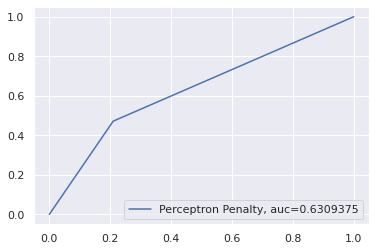

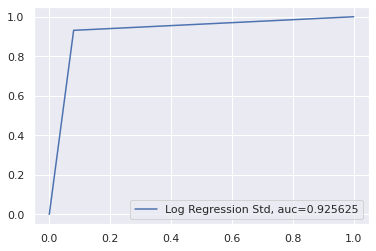

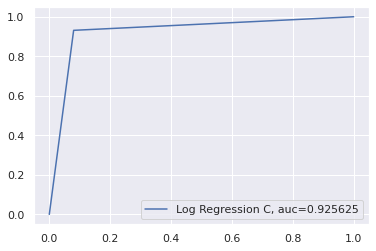

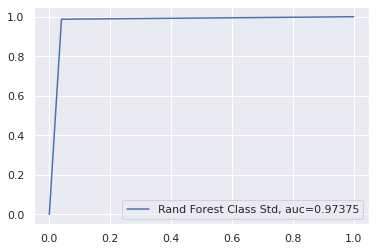

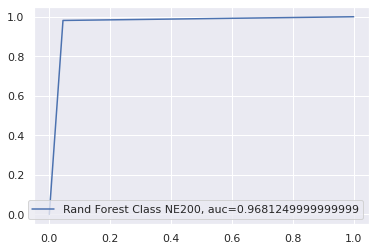

In [244]:
#Plot the ROC curves
directory = '/mnt/d/Documents/Python IDLE/DM_Final_Project/Graphs/'
names2 = ['LinearSVC Std', 'LinearSVC RS42', 'Perceptron Std', 'Perceptron Penalty', 'Log Regression Std', 'Log Regression C', 'Rand Forest Class Std', 'Rand Forest Class NE200']
i=0
for item in y_pred_total:
  plt.plot(fpr[i],tpr[i],label=names2[i] + ", auc="+str(auc[i]))
  plt.legend(loc=4)
  #plt.savefig(directory+'ROC_'+names2[i], bbox_inches='tight')
  i+=1
  plt.show()

328


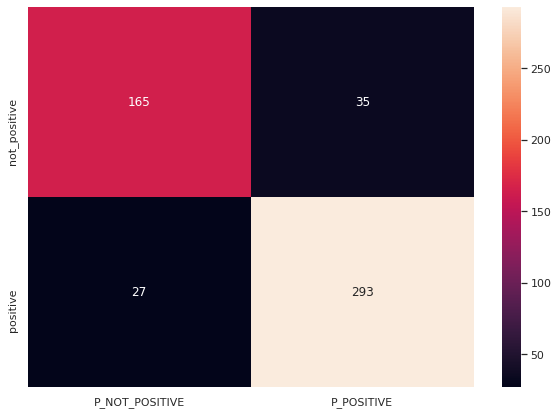

317


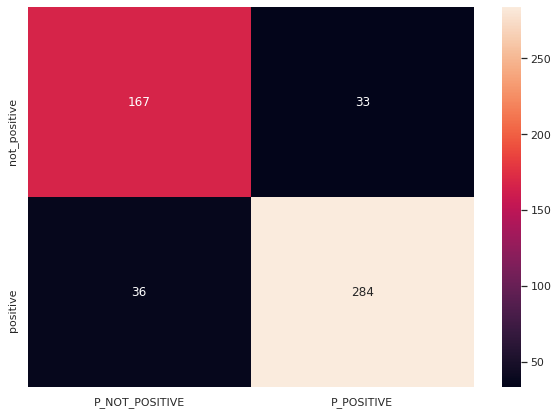

360


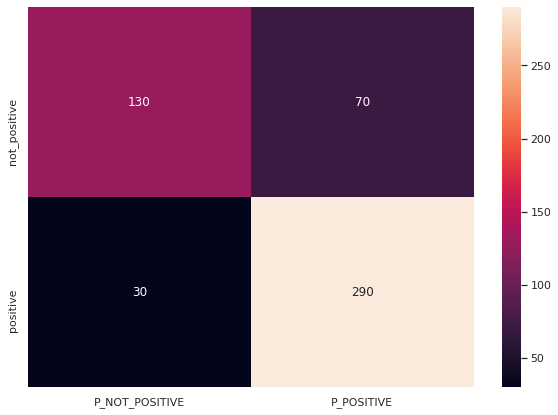

193


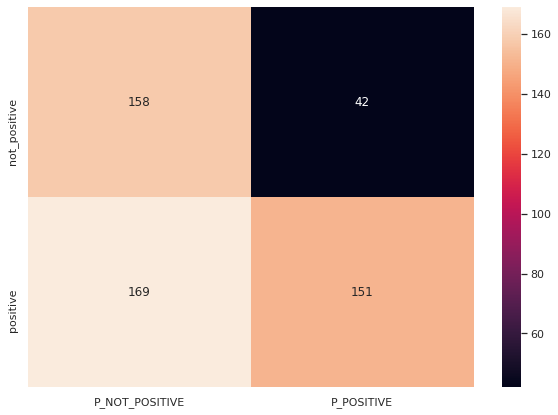

314


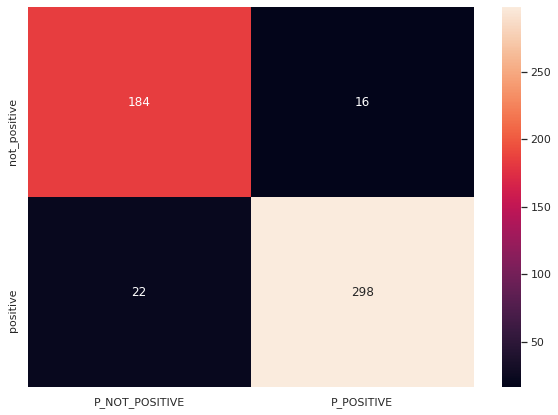

314


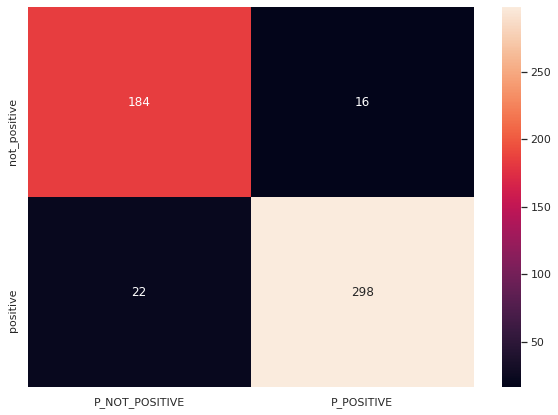

324


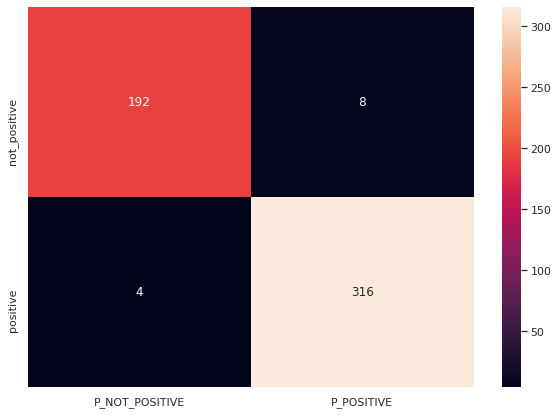

323


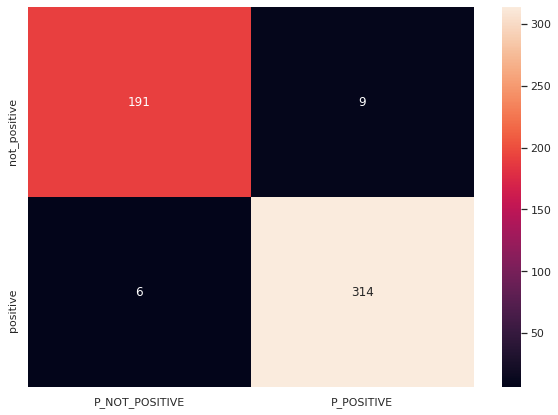

In [242]:
#Plot the Confusion matrices
directory = '/mnt/d/Documents/Python IDLE/DM_Final_Project/Graphs/'
names3 = ['LinearSVC Std', 'LinearSVC RS42', 'Perceptron Std', 'Perceptron Penalty', 'Log Regression Std', 'Log Regression C', 'Rand Forest Class Std', 'Rand Forest Class NE200']
i=0
for item in y_pred_total:
  cm = metrics.confusion_matrix(y, item)
  print(len([x for x in item if x == 1]))
  df_cm = pd.DataFrame(cm,['not_positive','positive'], ['P_NOT_POSITIVE','P_POSITIVE'])
  plt.figure(figsize=(10,7))
  sns.set(font_scale=1)# for label size
  sns.heatmap(df_cm, annot=True,fmt='d') # font size
  #plt.savefig(directory+'Confusion_'+names3[i], bbox_inches='tight')
  i+=1
  plt.show()

Auto Sklearn

In [48]:
from autosklearn.classification import AutoSklearnClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
auto_est = AutoSklearnClassifier(time_left_for_this_task=10*60, per_run_time_limit=60)
# perform the search
auto_est.fit(X_train, y_train)
print(auto_est.sprint_statistics())
#evaluate best model
predictions = auto_est.predict(X_test)
acc = accuracy_score(y_test, predictions)
print("Accuracy: %.3f" % acc)

[WARNING] [2021-05-26 00:32:39,673:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2021-05-26 00:32:40,182:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2021-05-26 00:32:40,558:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2021-05-26 00:32:40,943:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2021-05-26 00:32:47,675:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] [2021-05-26 00:32:54,082:smac.runhistory.runhistory2epm.RunHistory2EPM4LogCost] Got cost of smaller/equal to 0. Replace by 0.000010 since we use log cost.
[WARNING] 

In [69]:
from operator import itemgetter
max(modelitos, key=itemgetter(0))

(0.18,
 SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'adaboost', 'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'none', 'feature_preprocessor:__choice__': 'select_rates_classification', 'classifier:adaboost:algorithm': 'SAMME', 'classifier:adaboost:learning_rate': 0.04877457335996765, 'classifier:adaboost:max_depth': 4, 'classifier:adaboost:n_estimators': 445, 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.08697562117001002, 'feature_preprocessor:select_rates_classification:alpha': 0.270303766823959, 'feature_preprocessor:select_rates_classification:score_func': 'chi2', 'feature_preprocessor:select_rates_

2) Associação

In [126]:
df_diabetes_names = df_diabetes
df_diabetes_names.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,58,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,41,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,45,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,60,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [129]:
for age in df_diabetes_names['Age']:
    if int(age) <= 20:
        df_diabetes_names['Age'].replace(age, 'less than 20', inplace=True)
    elif int(age) <= 45:
        df_diabetes_names['Age'].replace(age, '21 to 45', inplace=True)
    elif int(age) <= 69:
        df_diabetes_names['Age'].replace(age, '46 to 69', inplace=True)
    else:
        df_diabetes_names['Age'].replace(age, 'more than 70', inplace=True)

df_diabetes_names.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,21 to 45,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,46 to 69,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,21 to 45,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,21 to 45,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,46 to 69,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [130]:
#Change the data from binary to textual for easier interpretation
#0 no, 1 yes [0,1]
headers = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']
new_names = [['Female', 'Male'], ['No Polyuria', 'Polyuria'], ['No Polydipsia', 'Polydipsia'], ['No Sudden Weight Loss', 'Sudden Weight Loss'], ['No Weakness', 'Weakness'], ['No Polyphagia', 'Polyphagia'], ['No Genital Thrush', 'Genital Thrush'], ['No Visual Blurring', 'Visual Blurring'], ['No Itching', 'Itching'], ['No Irritability', 'Irritability'], ['No Delayed Healing', 'Delayed Healing'], ['No Partial Paresis', 'Partial Paresis'], ['No Muscle Stiffness', 'Muscle Stiffness'], ['No Alopecia', 'Alopecia'], ['No Obesity', 'Obesity'], ['Negative', 'Positive']]

for header,value in zip(headers, new_names):
    df_diabetes_names[header].replace(0.0, value[0], inplace=True)
    df_diabetes_names[header].replace(1.0, value[1], inplace=True)


In [131]:
df_diabetes_names.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,21 to 45,Male,No Polyuria,Polydipsia,No Sudden Weight Loss,Weakness,No Polyphagia,No Genital Thrush,No Visual Blurring,Itching,No Irritability,Delayed Healing,No Partial Paresis,Muscle Stiffness,Alopecia,Obesity,Positive
1,46 to 69,Male,No Polyuria,No Polydipsia,No Sudden Weight Loss,Weakness,No Polyphagia,No Genital Thrush,Visual Blurring,No Itching,No Irritability,No Delayed Healing,Partial Paresis,No Muscle Stiffness,Alopecia,No Obesity,Positive
2,21 to 45,Male,Polyuria,No Polydipsia,No Sudden Weight Loss,Weakness,Polyphagia,No Genital Thrush,No Visual Blurring,Itching,No Irritability,Delayed Healing,No Partial Paresis,Muscle Stiffness,Alopecia,No Obesity,Positive
3,21 to 45,Male,No Polyuria,No Polydipsia,Sudden Weight Loss,Weakness,Polyphagia,Genital Thrush,No Visual Blurring,Itching,No Irritability,Delayed Healing,No Partial Paresis,No Muscle Stiffness,No Alopecia,No Obesity,Positive
4,46 to 69,Male,Polyuria,Polydipsia,Sudden Weight Loss,Weakness,Polyphagia,No Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Alopecia,Obesity,Positive


In [132]:
#put the data in a list
transactions = []
for i in range(0, df_diabetes_names.shape[0]):
    transactions.append([str(df_diabetes_names.values[i, j]) for j in range(0, 16)])

print(transactions[0])

['21 to 45', 'Male', 'No Polyuria', 'Polydipsia', 'No Sudden Weight Loss', 'Weakness', 'No Polyphagia', 'No Genital Thrush', 'No Visual Blurring', 'Itching', 'No Irritability', 'Delayed Healing', 'No Partial Paresis', 'Muscle Stiffness', 'Alopecia', 'Obesity']


In [134]:
from efficient_apriori import apriori

In [138]:
itemsets, rules = apriori(transactions, min_support=0.5, min_confidence=0.6)

In [139]:
rules_rhs = filter(lambda rule: len(rule.lhs) >= 1 and len(rule.rhs) >= 1, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
  print(rule)

{No Obesity} -> {Male} (conf: 0.632, supp: 0.525, lift: 1.002, conv: 1.003)
{Male} -> {No Obesity} (conf: 0.832, supp: 0.525, lift: 1.002, conv: 1.009)
{No Obesity} -> {No Alopecia} (conf: 0.662, supp: 0.550, lift: 1.010, conv: 1.019)
{No Alopecia} -> {No Obesity} (conf: 0.839, supp: 0.550, lift: 1.010, conv: 1.049)
{No Obesity} -> {No Genital Thrush} (conf: 0.787, supp: 0.654, lift: 1.013, conv: 1.047)
{No Genital Thrush} -> {No Obesity} (conf: 0.842, supp: 0.654, lift: 1.013, conv: 1.068)
{No Irritability} -> {No Alopecia} (conf: 0.668, supp: 0.506, lift: 1.018, conv: 1.035)
{No Alopecia} -> {No Irritability} (conf: 0.771, supp: 0.506, lift: 1.018, conv: 1.059)
{No Obesity} -> {No Irritability} (conf: 0.782, supp: 0.650, lift: 1.033, conv: 1.114)
{No Irritability} -> {No Obesity} (conf: 0.858, supp: 0.650, lift: 1.033, conv: 1.191)
{No Genital Thrush, No Irritability} -> {No Obesity} (conf: 0.860, supp: 0.531, lift: 1.035, conv: 1.207)
{No Obesity} -> {No Genital Thrush, No Irritabil

In [140]:
itemsets, rules = apriori(transactions, min_support=0.4, min_confidence=0.6)

In [141]:
rules_rhs = filter(lambda rule: len(rule.lhs) >= 1 and len(rule.rhs) >= 1, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
  print(rule)

{No Partial Paresis} -> {No Genital Thrush} (conf: 0.706, supp: 0.402, lift: 0.909, conv: 0.759)
{Male} -> {No Genital Thrush} (conf: 0.710, supp: 0.448, lift: 0.914, conv: 0.770)
{Weakness} -> {No Irritability} (conf: 0.705, supp: 0.413, lift: 0.930, conv: 0.821)
{46 to 69} -> {No Obesity} (conf: 0.789, supp: 0.410, lift: 0.950, conv: 0.802)
{No Muscle Stiffness} -> {No Genital Thrush} (conf: 0.745, supp: 0.465, lift: 0.958, conv: 0.873)
{No Muscle Stiffness, No Obesity} -> {No Genital Thrush} (conf: 0.751, supp: 0.412, lift: 0.966, conv: 0.895)
{No Polyphagia} -> {No Genital Thrush} (conf: 0.753, supp: 0.410, lift: 0.969, conv: 0.902)
{No Delayed Healing} -> {No Obesity} (conf: 0.808, supp: 0.437, lift: 0.972, conv: 0.881)
{Weakness} -> {No Obesity} (conf: 0.816, supp: 0.479, lift: 0.983, conv: 0.922)
{Weakness} -> {No Genital Thrush} (conf: 0.767, supp: 0.450, lift: 0.988, conv: 0.958)
{No Partial Paresis} -> {No Obesity} (conf: 0.828, supp: 0.471, lift: 0.996, conv: 0.982)
{Itching

In [142]:
rules_rhs = filter(lambda rule: len(rule.lhs) >= 1 and len(rule.rhs) >= 2, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
  print(rule)

{No Muscle Stiffness} -> {No Genital Thrush, No Obesity} (conf: 0.658, supp: 0.412, lift: 1.007, conv: 1.014)
{No Alopecia} -> {No Irritability, No Obesity} (conf: 0.663, supp: 0.435, lift: 1.020, conv: 1.038)
{Male} -> {No Irritability, No Obesity} (conf: 0.665, supp: 0.419, lift: 1.023, conv: 1.044)
{No Obesity} -> {No Genital Thrush, No Irritability} (conf: 0.639, supp: 0.531, lift: 1.035, conv: 1.060)
{No Muscle Stiffness} -> {No Genital Thrush, No Irritability} (conf: 0.646, supp: 0.404, lift: 1.047, conv: 1.082)
{No Genital Thrush} -> {No Irritability, No Obesity} (conf: 0.683, supp: 0.531, lift: 1.051, conv: 1.105)
{No Irritability} -> {No Genital Thrush, No Obesity} (conf: 0.701, supp: 0.531, lift: 1.071, conv: 1.156)
{No Alopecia} -> {No Genital Thrush, No Irritability} (conf: 0.666, supp: 0.437, lift: 1.078, conv: 1.145)
{No Partial Paresis} -> {No Irritability, No Obesity} (conf: 0.703, supp: 0.400, lift: 1.081, conv: 1.177)
{No Alopecia} -> {No Genital Thrush, No Obesity} (

In [143]:
rules_rhs = filter(lambda rule: len(rule.lhs) >= 2 and len(rule.rhs) >= 1, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
  print(rule)

{No Muscle Stiffness, No Obesity} -> {No Genital Thrush} (conf: 0.751, supp: 0.412, lift: 0.966, conv: 0.895)
{No Genital Thrush, No Obesity} -> {No Muscle Stiffness} (conf: 0.629, supp: 0.412, lift: 1.007, conv: 1.012)
{No Irritability, No Muscle Stiffness} -> {No Genital Thrush} (conf: 0.784, supp: 0.404, lift: 1.009, conv: 1.031)
{No Irritability, No Obesity} -> {No Alopecia} (conf: 0.669, supp: 0.435, lift: 1.020, conv: 1.039)
{No Irritability, No Obesity} -> {Male} (conf: 0.645, supp: 0.419, lift: 1.023, conv: 1.040)
{No Alopecia, No Genital Thrush} -> {No Obesity} (conf: 0.850, supp: 0.467, lift: 1.023, conv: 1.126)
{No Alopecia, No Irritability} -> {No Obesity} (conf: 0.859, supp: 0.435, lift: 1.034, conv: 1.203)
{No Genital Thrush, No Irritability} -> {No Obesity} (conf: 0.860, supp: 0.531, lift: 1.035, conv: 1.207)
{No Irritability, No Partial Paresis} -> {No Obesity} (conf: 0.863, supp: 0.400, lift: 1.039, conv: 1.236)
{No Alopecia, No Obesity} -> {No Irritability} (conf: 0.7

In [147]:
itemsets2, rules2 = apriori(transactions, min_support=0.6, min_confidence=0.6)

In [149]:
rules_rhs = filter(lambda rule: len(rule.lhs) >= 1 and len(rule.rhs) >= 1, rules2)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
  print(rule)

{No Obesity} -> {No Genital Thrush} (conf: 0.787, supp: 0.654, lift: 1.013, conv: 1.047)
{No Genital Thrush} -> {No Obesity} (conf: 0.842, supp: 0.654, lift: 1.013, conv: 1.068)
{No Obesity} -> {No Irritability} (conf: 0.782, supp: 0.650, lift: 1.033, conv: 1.114)
{No Irritability} -> {No Obesity} (conf: 0.858, supp: 0.650, lift: 1.033, conv: 1.191)
{No Irritability} -> {No Genital Thrush} (conf: 0.815, supp: 0.617, lift: 1.049, conv: 1.204)
{No Genital Thrush} -> {No Irritability} (conf: 0.795, supp: 0.617, lift: 1.049, conv: 1.179)


C) Clusterização

Clustering with Bike Dataset

In [115]:
df_bikes_teste = pd.read_csv('/mnt/d/Documents/Python IDLE/DM_Final_Project/DB/SeoulBikeData.csv', encoding="ISO-8859-1", header=1, names=['Date', 'Rented_Bike_Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind_Speed(m/s)', 'Visibility(10m)', 'Dew_Point_Temperature(°C)', 'Solar_Radiation(MJ/m2)', 'Rainfall(mm)', 'Snowfall(cm)', 'Seasons', 'Holiday', 'Functioning_Day'])
df_bikes_teste.describe()

,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_Speed(m/s),Visibility(10m),Dew_Point_Temperature(°C),Solar_Radiation(MJ/m2),Rainfall(mm),Snowfall(cm)
count,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000
mean,704.653499,11.501313,12.884987,58.228679,1.724854,1436.761502,4.076287,0.569176,0.148704,0.075077
std,645.016317,6.921886,11.943944,20.362312,1.036347,608.303670,13.059061,0.868775,1.128256,0.436770
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,6.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,505.000000,12.000000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.500000,17.500000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [2]:
df_bikes = pd.read_csv('/mnt/d/Documents/Python IDLE/DM_Final_Project/DB/SeoulBikeData.csv', encoding="ISO-8859-1", header=1, names=['Date', 'Rented_Bike_Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind_Speed(m/s)', 'Visibility(10m)', 'Dew_Point_Temperature(°C)', 'Solar_Radiation(MJ/m2)', 'Rainfall(mm)', 'Snowfall(cm)', 'Seasons', 'Holiday', 'Functioning_Day'])
df_bikes.drop(['Date', 'Hour', 'Seasons', 'Holiday', 'Functioning_Day'], axis=1, inplace=True)

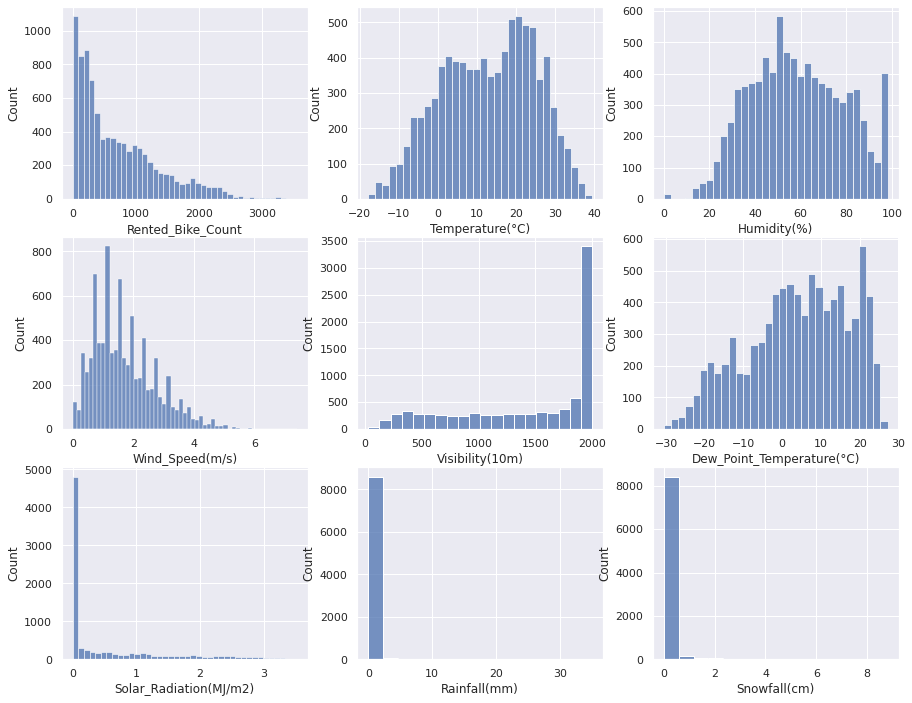

In [6]:
directory = '/mnt/d/Documents/Python IDLE/DM_Final_Project/Graphs/'
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
#fig.suptitle('Initial analysis')
sns.histplot(ax=axes[0,0], data=df_bikes['Rented_Bike_Count'])
sns.histplot(ax=axes[0,1], data=df_bikes['Temperature(°C)'])
sns.histplot(ax=axes[0,2], data=df_bikes['Humidity(%)'])
sns.histplot(ax=axes[1,0], data=df_bikes['Wind_Speed(m/s)'])
sns.histplot(ax=axes[1,1], data=df_bikes['Visibility(10m)'])
sns.histplot(ax=axes[1,2], data=df_bikes['Dew_Point_Temperature(°C)'])
sns.histplot(ax=axes[2,0], data=df_bikes['Solar_Radiation(MJ/m2)'])
sns.histplot(ax=axes[2,1], data=df_bikes['Rainfall(mm)'])
sns.histplot(ax=axes[2,2], data=df_bikes['Snowfall(cm)'])
plt.savefig(directory+'Clust_InitialAnalysis', bbox_inches='tight')

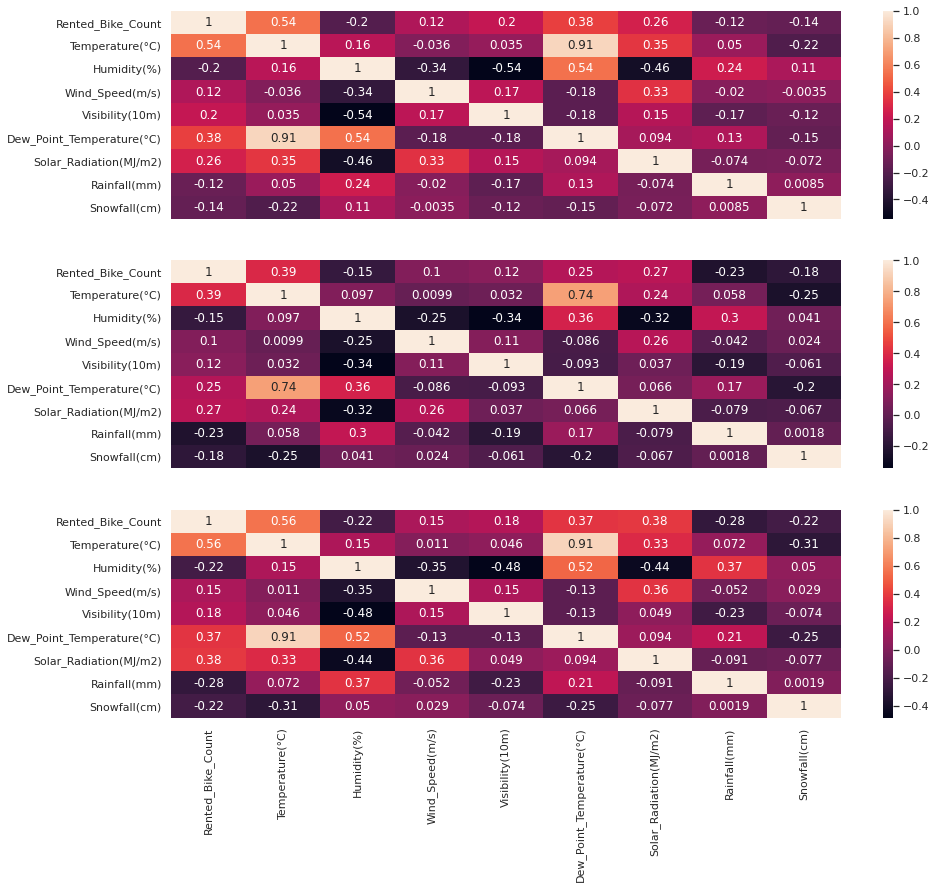

In [5]:
#Check for correlations between the data
fig, axes = plt.subplots(3, figsize=(15, 13), sharex=True)
#fig.suptitle('Correlations')

sns.heatmap(ax=axes[0], data=df_bikes.corr(method='pearson', min_periods=1),annot=True)
sns.heatmap(ax=axes[1], data=df_bikes.corr(method='kendall', min_periods=1),annot=True)
sns.heatmap(ax=axes[2], data=df_bikes.corr(method='spearman', min_periods=1),annot=True)
#plt.savefig(directory+'Clust_Correlations', bbox_inches='tight')

In [7]:
#Scale the data
rescaled_df_minmax = MinMaxScaler().fit_transform(df_bikes)
df_minmax = pd.DataFrame(data=rescaled_df_minmax, columns=df_bikes.columns)

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_minmax)
    #inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

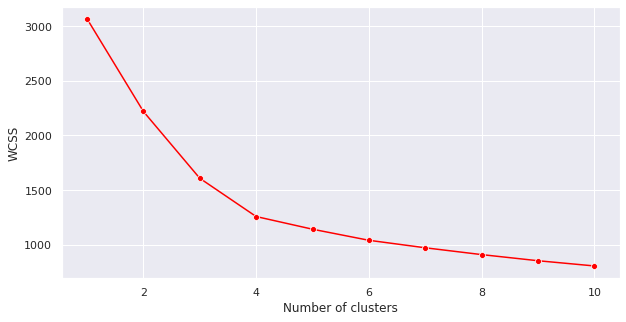

In [11]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
#plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
#plt.savefig(directory+'Clust_Elbow', bbox_inches='tight')
plt.show()

In [20]:
km = KMeans(n_clusters=4, init='k-means++')

In [28]:
#normalised dataset
estm = km.fit(df_minmax)
centroids = estm.cluster_centers_
y_predicted_minmax = estm.labels_
y_predicted_minmax

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [34]:
centroids

array([[ 3.16699463e-01,  7.19016088e-01,  4.24143492e-01,
         3.10189399e-01,  8.09207987e-01,  6.85085250e-01,
         6.12990535e-01,  3.70096225e-06,  1.90819582e-17,
         3.00000000e+00],
       [ 1.23499177e-01,  5.07629317e-01,  7.85822178e-01,
         1.88809997e-01,  2.98048667e-01,  6.52232953e-01,
         4.99140449e-02,  1.30657062e-02,  1.86005028e-02,
         1.00000000e+00],
       [ 9.16257461e-02,  2.88631364e-01,  4.24990968e-01,
         2.66221737e-01,  8.96434365e-01,  3.01609790e-01,
         9.22721599e-02,  4.15018481e-05,  1.31587092e-02,
        -4.21884749e-15],
       [ 2.90307462e-01,  6.67644537e-01,  6.58389090e-01,
         2.00516615e-01,  9.01440302e-01,  7.55494926e-01,
         5.63408023e-02,  1.95400369e-03, -6.24500451e-17,
         2.00000000e+00]])

In [29]:
df_minmax['cluster'] = y_predicted_minmax
df_minmax.head()

,Rented_Bike_Count,Temperature(°C),Humidity(%),Wind_Speed(m/s),Visibility(10m),Dew_Point_Temperature(°C),Solar_Radiation(MJ/m2),Rainfall(mm),Snowfall(cm),cluster
0,0.057368,0.215035,0.387755,0.108108,1.0,0.224913,0.0,0.0,0.0,2
1,0.048650,0.206294,0.397959,0.135135,1.0,0.223183,0.0,0.0,0.0,2
2,0.030090,0.202797,0.408163,0.121622,1.0,0.224913,0.0,0.0,0.0,2
3,0.021935,0.206294,0.367347,0.310811,1.0,0.207612,0.0,0.0,0.0,2
4,0.028121,0.199301,0.377551,0.202703,1.0,0.205882,0.0,0.0,0.0,2


In [30]:
df_bikes_minmax = df_bikes
df_bikes_minmax['Cluster'] = y_predicted_minmax.tolist()
df_bikes_minmax.head()

,Rented_Bike_Count,Temperature(°C),Humidity(%),Wind_Speed(m/s),Visibility(10m),Dew_Point_Temperature(°C),Solar_Radiation(MJ/m2),Rainfall(mm),Snowfall(cm),Cluster
0,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2
1,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2
2,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2
3,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2
4,100,-6.4,37,1.5,2000,-18.7,0.0,0.0,0.0,2


In [31]:
clusters_table_minmax = pd.pivot_table(df_bikes_minmax, index=['Cluster'])
clusters_table_minmax

,Dew_Point_Temperature(°C),Humidity(%),Rainfall(mm),Rented_Bike_Count,Snowfall(cm),Solar_Radiation(MJ/m2),Temperature(°C),Visibility(10m),Wind_Speed(m/s)
Cluster,,,,,,,,,
0,8.997927,41.566062,0.000130,1126.183290,0.000000,2.157727,23.327720,1623.567358,2.295402
1,7.099065,77.010573,0.457300,439.163074,0.163684,0.175697,11.236397,615.050020,1.397194
2,-13.166954,41.649115,0.001453,325.821153,0.115797,0.324798,-1.290286,1795.665002,1.970041
3,13.067607,64.522131,0.068390,1032.333333,0.000000,0.198320,20.389268,1805.541716,1.483823


In [32]:
cluster_0 = df_bikes_minmax.loc[df_bikes_minmax['Cluster'] == 0]
cluster_1 = df_bikes_minmax.loc[df_bikes_minmax['Cluster'] == 1]
cluster_2 = df_bikes_minmax.loc[df_bikes_minmax['Cluster'] == 2]
cluster_3 = df_bikes_minmax.loc[df_bikes_minmax['Cluster'] == 3]
sizes = [len(cluster_0), len(cluster_1), len(cluster_2), len(cluster_3)]

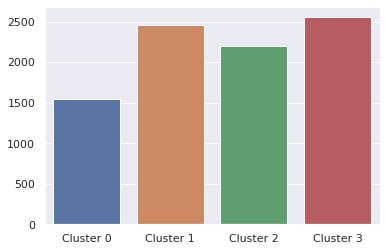

In [35]:
fig.suptitle('Clusters comparison')
axis=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
sns.barplot(x=axis,y=sizes)
#plt.savefig(directory+'Clust_Values', bbox_inches='tight')

DBSCAN

In [37]:
from sklearn.cluster import DBSCAN

In [38]:
df_bikes_dbscan = pd.read_csv('/mnt/d/Documents/Python IDLE/DM_Final_Project/DB/SeoulBikeData.csv', encoding="ISO-8859-1", header=1, names=['Date', 'Rented_Bike_Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind_Speed(m/s)', 'Visibility(10m)', 'Dew_Point_Temperature(°C)', 'Solar_Radiation(MJ/m2)', 'Rainfall(mm)', 'Snowfall(cm)', 'Seasons', 'Holiday', 'Functioning_Day'])
df_bikes_dbscan.drop(['Date', 'Seasons', 'Holiday', 'Functioning_Day'], axis=1, inplace=True)

In [39]:
#Scale the data
rescaled_df_minmax = MinMaxScaler().fit_transform(df_bikes_dbscan)
df_minmax = pd.DataFrame(data=rescaled_df_minmax, columns=df_bikes_dbscan.columns)

In [82]:
clustering = DBSCAN(eps=1).fit_predict(df_minmax)
clustering

array([0, 0, 0, ..., 0, 0, 0])

In [84]:
df_minmax_cluster = df_minmax
df_minmax_cluster['cluster'] = clustering
df_minmax.head()

,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_Speed(m/s),Visibility(10m),Dew_Point_Temperature(°C),Solar_Radiation(MJ/m2),Rainfall(mm),Snowfall(cm),cluster
0,0.057368,0.043478,0.215035,0.387755,0.108108,1.0,0.224913,0.0,0.0,0.0,0
1,0.048650,0.086957,0.206294,0.397959,0.135135,1.0,0.223183,0.0,0.0,0.0,0
2,0.030090,0.130435,0.202797,0.408163,0.121622,1.0,0.224913,0.0,0.0,0.0,0
3,0.021935,0.173913,0.206294,0.367347,0.310811,1.0,0.207612,0.0,0.0,0.0,0
4,0.028121,0.217391,0.199301,0.377551,0.202703,1.0,0.205882,0.0,0.0,0.0,0


In [85]:
df_bikes_minmax = df_bikes_dbscan
df_bikes_minmax['Cluster'] = clustering.tolist()
df_bikes_minmax.head()

,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_Speed(m/s),Visibility(10m),Dew_Point_Temperature(°C),Solar_Radiation(MJ/m2),Rainfall(mm),Snowfall(cm),Cluster
0,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0
1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0
2,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0
3,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0
4,100,5,-6.4,37,1.5,2000,-18.7,0.0,0.0,0.0,0


In [86]:
clusters_table_minmax = pd.pivot_table(df_bikes_minmax, index=['Cluster'])
clusters_table_minmax

,Dew_Point_Temperature(°C),Hour,Humidity(%),Rainfall(mm),Rented_Bike_Count,Snowfall(cm),Solar_Radiation(MJ/m2),Temperature(°C),Visibility(10m),Wind_Speed(m/s)
Cluster,,,,,,,,,,
0,4.033112,11.530315,58.191862,0.149284,706.437479,0.07537,0.571394,12.851163,1435.607106,1.728092
1,2.300000,4.200000,82.200000,0.000000,84.400000,0.00000,0.000000,5.160000,192.800000,0.760000
2,9.460000,4.600000,58.700000,0.000000,219.700000,0.00000,0.000000,17.730000,2000.000000,1.460000
3,21.880000,2.200000,68.000000,0.000000,450.600000,0.00000,0.000000,28.400000,2000.000000,0.840000
4,21.714286,4.571429,68.857143,0.000000,259.285714,0.00000,0.000000,28.014286,1994.000000,0.300000
5,21.114286,4.000000,68.714286,0.000000,243.714286,0.00000,0.000000,27.428571,2000.000000,0.814286


In [79]:
cluster_n1 = df_bikes_minmax.loc[df_bikes_minmax['Cluster'] == -1]
cluster_0 = df_bikes_minmax.loc[df_bikes_minmax['Cluster'] == 0]
cluster_1 = df_bikes_minmax.loc[df_bikes_minmax['Cluster'] == 1]
cluster_2 = df_bikes_minmax.loc[df_bikes_minmax['Cluster'] == 2]
cluster_3 = df_bikes_minmax.loc[df_bikes_minmax['Cluster'] == 3]
cluster_4 = df_bikes_minmax.loc[df_bikes_minmax['Cluster'] == 4]
sizes = [len(cluster_n1), len(cluster_0), len(cluster_1), len(cluster_2), len(cluster_3), len(cluster_4)]

In [80]:
sizes

[8725, 5, 10, 7, 5, 7]

<AxesSubplot:>

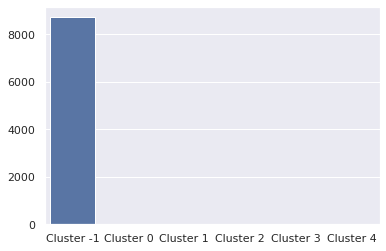

In [81]:
axis=['Cluster -1', 'Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
sns.barplot(x=axis,y=sizes)
#plt.savefig(directory+'Clust_Values', bbox_inches='tight')

In [ ]:
##############################################################################

In [52]:
clustering2 = DBSCAN(eps=0.5, min_samples=1000).fit_predict(df_minmax)
clustering2

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
df_minmax_cluster2 = df_minmax
df_minmax_cluster2['cluster'] = clustering2
df_bikes_minmax2 = df_bikes_dbscan
df_bikes_minmax2['Cluster'] = clustering2.tolist()
clusters_table_minmax2 = pd.pivot_table(df_bikes_minmax2, index=['Cluster'])
clusters_table_minmax2

,Dew_Point_Temperature(°C),Hour,Humidity(%),Rainfall(mm),Rented_Bike_Count,Snowfall(cm),Solar_Radiation(MJ/m2),Temperature(°C),Visibility(10m),Wind_Speed(m/s)
Cluster,,,,,,,,,,
-1,7.553476,17.695187,71.983957,1.947059,644.294118,0.808021,0.531658,12.828342,721.117647,2.318717
0,4.000432,11.366192,57.928605,0.109473,705.970252,0.059088,0.569994,12.886223,1452.373425,1.711899


<AxesSubplot:>

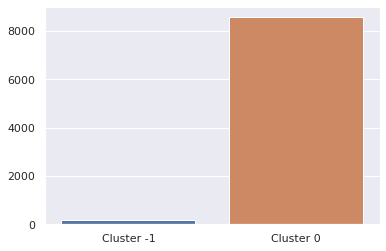

In [54]:
cluster_12 = df_bikes_minmax2.loc[df_bikes_minmax2['Cluster'] == -1]
cluster_02 = df_bikes_minmax2.loc[df_bikes_minmax2['Cluster'] == 0]
sizes = [len(cluster_12), len(cluster_02)]
axis=['Cluster -1', 'Cluster 0']
sns.barplot(x=axis,y=sizes)
#plt.savefig(directory+'Clust_Values', bbox_inches='tight')

In [55]:
sizes

[187, 8572]